In [1]:
# -------------------------
# Book Recommendation EDA
# -------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------
# 1) LOAD RAW DATA
# -------------------------
books   = pd.read_csv("Books.csv",   encoding="latin-1", low_memory=False)
ratings = pd.read_csv("Ratings.csv", encoding="latin-1", low_memory=False)
users   = pd.read_csv("Users.csv",   encoding="latin-1", low_memory=False)

print("Shapes -> Books:", books.shape, "| Ratings:", ratings.shape, "| Users:", users.shape)



Shapes -> Books: (271360, 8) | Ratings: (1149780, 3) | Users: (278858, 3)


In [2]:
# -------------------------
# 2) MERGE DATASETS
# -------------------------

# Step 1: Merge Ratings with Books (on ISBN)
ratings_books = ratings.merge(
    books[["ISBN", "Book-Title", "Book-Author", "Year-Of-Publication", "Publisher"]],
    on="ISBN",
    how="left"   # keep all ratings even if some ISBNs missing in books
)

# Step 2: Merge with Users (on User-ID)
df = ratings_books.merge(
    users[["User-ID", "Age", "Location"]],
    on="User-ID",
    how="left"
)

# Fix: Ensure Year-Of-Publication is numeric right after merging
df["Year-Of-Publication"] = pd.to_numeric(df["Year-Of-Publication"], errors="coerce")


# Step 3: Inspect the merged dataset
print("Shape of merged df:", df.shape)
print("Columns in df:", df.columns.tolist())
print(df.head())


Shape of merged df: (1149780, 9)
Columns in df: ['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Age', 'Location']
   User-ID        ISBN  Book-Rating  \
0   276725  034545104X            0   
1   276726  0155061224            5   
2   276727  0446520802            0   
3   276729  052165615X            3   
4   276729  0521795028            6   

                                          Book-Title      Book-Author  \
0                               Flesh Tones: A Novel       M. J. Rose   
1                                   Rites of Passage       Judith Rae   
2                                       The Notebook  Nicholas Sparks   
3                                     Help!: Level 1    Philip Prowse   
4  The Amsterdam Connection : Level 4 (Cambridge ...      Sue Leather   

   Year-Of-Publication                   Publisher   Age  \
0               2002.0            Ballantine Books   NaN   
1               2001.0                 

In [3]:
# -------------------------
# 3) EDA ON MERGED DATASET (df)
# -------------------------

# 1. Basic info
print("\nBasic info about df:")
print(df.info())
print(df.describe(include="all").transpose())

# 2. Missing values check
print("\nMissing values in df:")
print(df.isna().sum())




Basic info about df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1149780 non-null  int64  
 1   ISBN                 1149780 non-null  object 
 2   Book-Rating          1149780 non-null  int64  
 3   Book-Title           1031136 non-null  object 
 4   Book-Author          1031134 non-null  object 
 5   Year-Of-Publication  1031132 non-null  float64
 6   Publisher            1031134 non-null  object 
 7   Age                  840288 non-null   float64
 8   Location             1149780 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 78.9+ MB
None
                         count  unique                       top   freq  \
User-ID              1149780.0     NaN                       NaN    NaN   
ISBN                   1149780  340556                0971880107   2502   
B

In [4]:
# -------------------------
# Handle Missing Values
# -------------------------

# Fill text columns with "Unknown"
df["Book-Title"]    = df["Book-Title"].fillna("Unknown Title")
df["Book-Author"]   = df["Book-Author"].fillna("Unknown Author")
df["Publisher"]     = df["Publisher"].fillna("Unknown Publisher")

# Fill numeric columns with median
df["Year-Of-Publication"] = df["Year-Of-Publication"].fillna(df["Year-Of-Publication"].median())
df["Age"] = df["Age"].fillna(df["Age"].median())

# Fill location-related missing values
df["Location"] = df["Location"].fillna("Unknown Location")

print("\n✅ Missing values handled (no rows dropped).")
print(df.isnull().sum())



✅ Missing values handled (no rows dropped).
User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Age                    0
Location               0
dtype: int64



Ratings value counts:
Book-Rating
0     716109
1       1770
2       2759
3       5996
4       8904
5      50974
6      36924
7      76457
8     103736
9      67541
10     78610
Name: count, dtype: int64


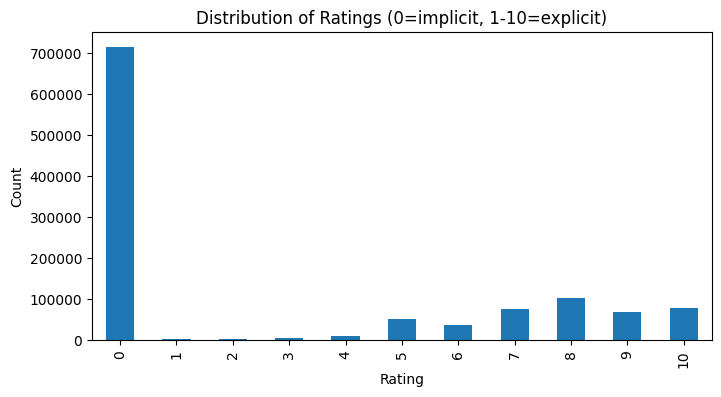

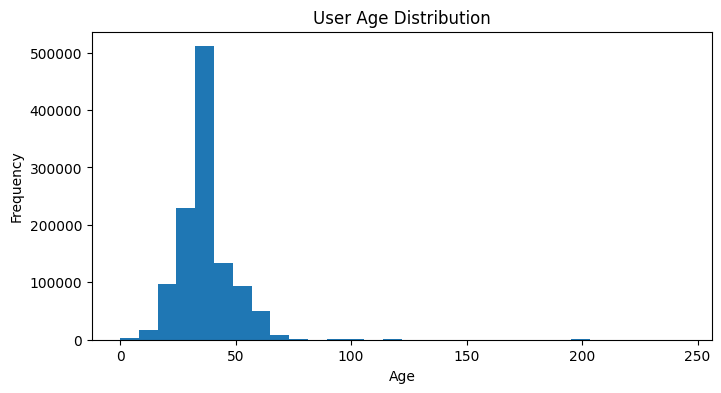

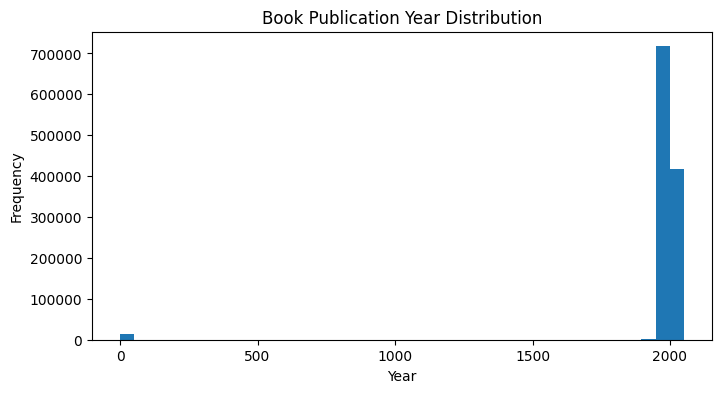


Top 10 Most Rated Books:
Book-Title
Unknown Title                                      118644
Wild Animus                                          2502
The Lovely Bones: A Novel                            1295
The Da Vinci Code                                     898
A Painted House                                       838
The Nanny Diaries: A Novel                            828
Bridget Jones's Diary                                 815
The Secret Life of Bees                               774
Divine Secrets of the Ya-Ya Sisterhood: A Novel       740
The Red Tent (Bestselling Backlist)                   723
Name: Book-Rating, dtype: int64


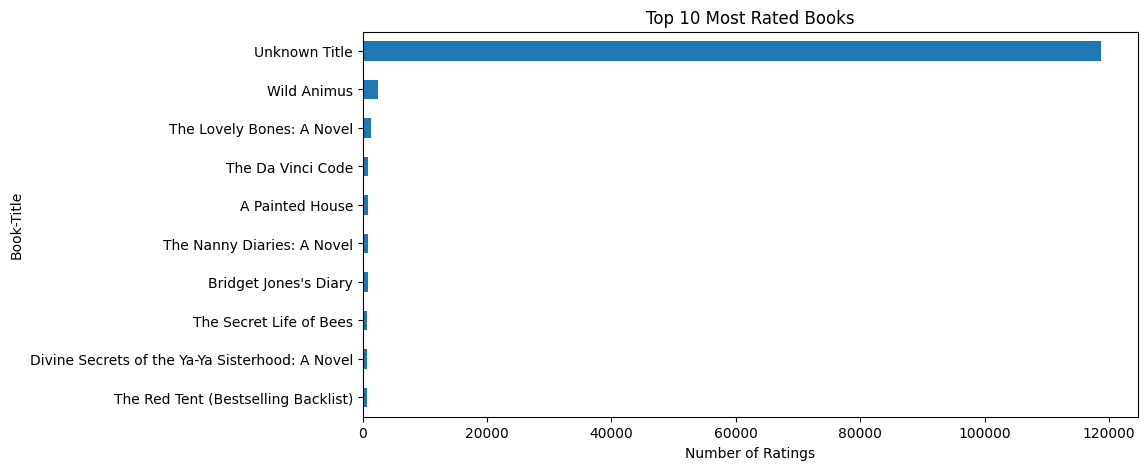


Top 10 Most Active Users:
User-ID
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
212898     4785
278418     4533
76352      3367
110973     3100
235105     3067
Name: Book-Rating, dtype: int64


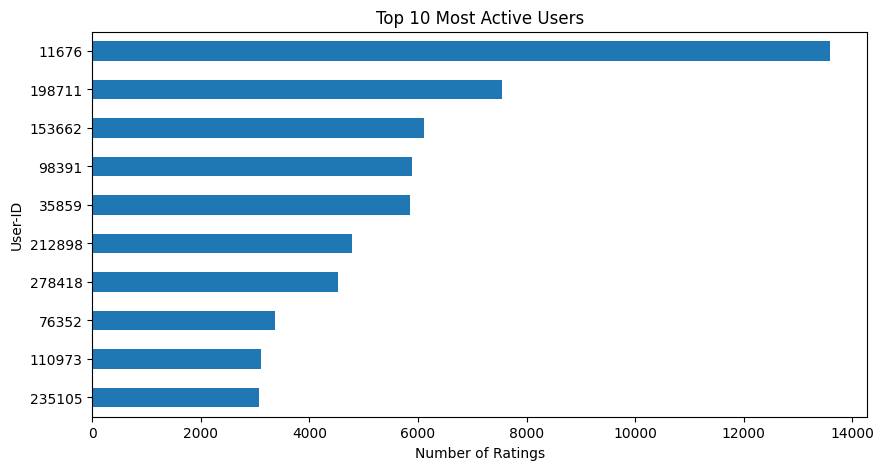


Top 10 Authors by Average Rating:
Book-Author
retold by Dandi        10.0
of Padua Marsilius     10.0
Fran Lehen             10.0
johanna spyri          10.0
Fran Stewar            10.0
Fran Sullivan          10.0
Forrest Ackerman       10.0
Richard M. Barnhart    10.0
Richard M Barry        10.0
Richard Loseby         10.0
Name: Book-Rating, dtype: float64


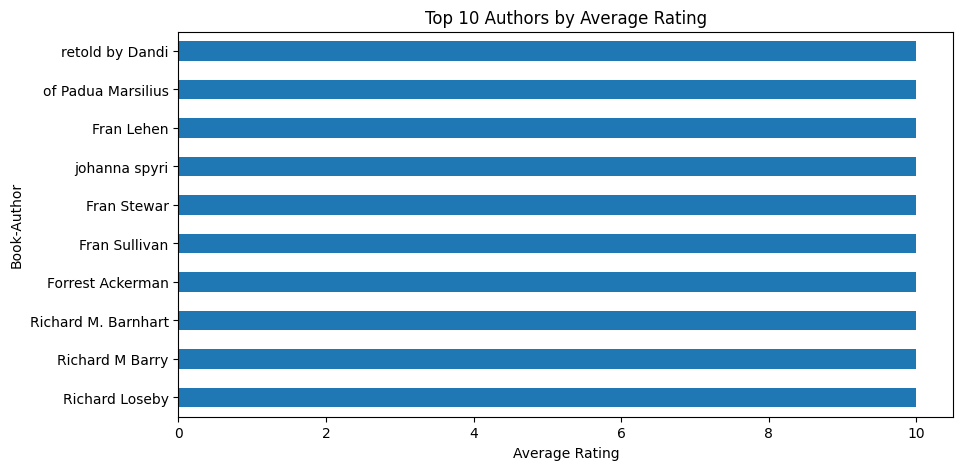

/tmp/ipython-input-4020254574.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.values, y=top_publishers.index, palette="cubehelix")
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


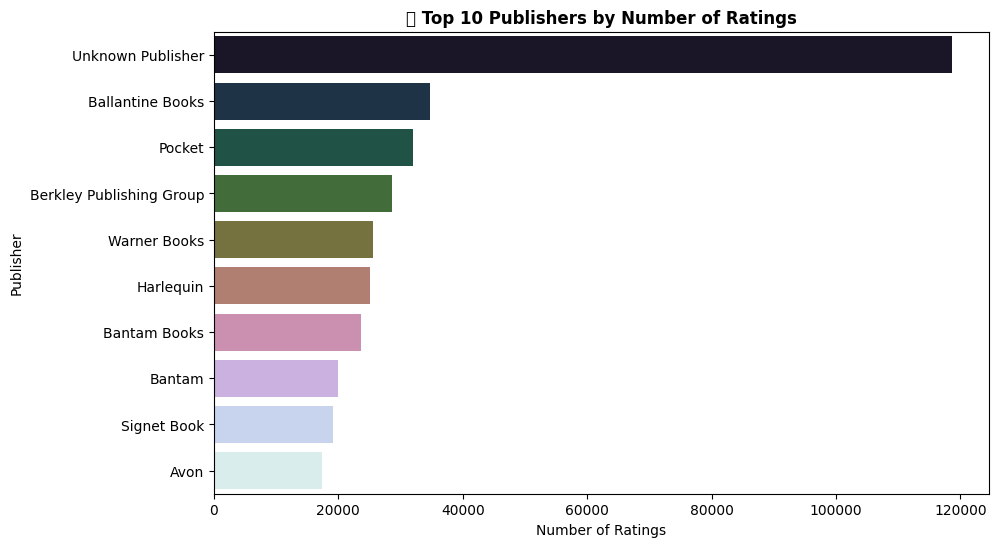

In [5]:
# 3. Ratings distribution
print("\nRatings value counts:")
print(df["Book-Rating"].value_counts().sort_index())

plt.figure(figsize=(8,4))
df["Book-Rating"].value_counts().sort_index().plot(kind="bar")
plt.title("Distribution of Ratings (0=implicit, 1-10=explicit)")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# 4. Age distribution
plt.figure(figsize=(8,4))
df["Age"].dropna().plot(kind="hist", bins=30)
plt.title("User Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# 5. Publication year distribution
# Ensure Year-Of-Publication is numeric
df["Year-Of-Publication"] = pd.to_numeric(df["Year-Of-Publication"], errors="coerce")
plt.figure(figsize=(8,4))
df["Year-Of-Publication"].dropna().plot(kind="hist", bins=40)
plt.title("Book Publication Year Distribution")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()

# 6. Top 10 most rated books
top_books = (df.groupby("Book-Title")["Book-Rating"]
               .count()
               .sort_values(ascending=False)
               .head(10))
print("\nTop 10 Most Rated Books:")
print(top_books)

plt.figure(figsize=(10,5))
top_books.plot(kind="barh")
plt.title("Top 10 Most Rated Books")
plt.xlabel("Number of Ratings")
plt.gca().invert_yaxis()
plt.show()

# 7. Top 10 most active users
top_users = (df.groupby("User-ID")["Book-Rating"]
               .count()
               .sort_values(ascending=False)
               .head(10))
print("\nTop 10 Most Active Users:")
print(top_users)

plt.figure(figsize=(10,5))
top_users.plot(kind="barh")
plt.title("Top 10 Most Active Users")
plt.xlabel("Number of Ratings")
plt.gca().invert_yaxis()
plt.show()

# 8. Average rating per author (top 10)
top_authors = (df.groupby("Book-Author")["Book-Rating"]
                 .mean()
                 .sort_values(ascending=False)
                 .head(10))
print("\nTop 10 Authors by Average Rating:")
print(top_authors)

plt.figure(figsize=(10,5))
top_authors.plot(kind="barh")
plt.title("Top 10 Authors by Average Rating")
plt.xlabel("Average Rating")
plt.gca().invert_yaxis()
plt.show()

# 9. Publisher analysis (top 10 by rating count)



# 5. Publication year distribution
top_publishers = (df.groupby("Publisher")["Book-Rating"]
                    .count()
                    .sort_values(ascending=False)
                    .head(10))

plt.figure(figsize=(10,6))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette="cubehelix")
plt.title("🏢 Top 10 Publishers by Number of Ratings", weight="bold")
plt.xlabel("Number of Ratings")
plt.ylabel("Publisher")
plt.show()

In [6]:
# -------------------------
# 4) BASIC STATS
# -------------------------
n_users    = users["User-ID"].nunique()
n_books    = books["ISBN"].nunique()
n_ratings  = len(ratings)
n_explicit = (ratings["Book-Rating"] > 0).sum()
n_implicit = (ratings["Book-Rating"] == 0).sum()
sparsity   = 1 - (n_ratings / (n_users * n_books))

print("\nSummary Stats:")
print({
    "unique_users": n_users,
    "unique_books": n_books,
    "total_ratings": n_ratings,
    "explicit_ratings": n_explicit,
    "implicit_ratings": n_implicit,
    "matrix_sparsity": sparsity
})




Summary Stats:
{'unique_users': 278858, 'unique_books': 271360, 'total_ratings': 1149780, 'explicit_ratings': np.int64(433671), 'implicit_ratings': np.int64(716109), 'matrix_sparsity': 0.9999848055210727}



Age outliers: 80917 rows
Lower bound = 16.0, Upper bound = 56.0

Year-Of-Publication outliers: 48698 rows
Lower bound = 1980.0, Upper bound = 2012.0


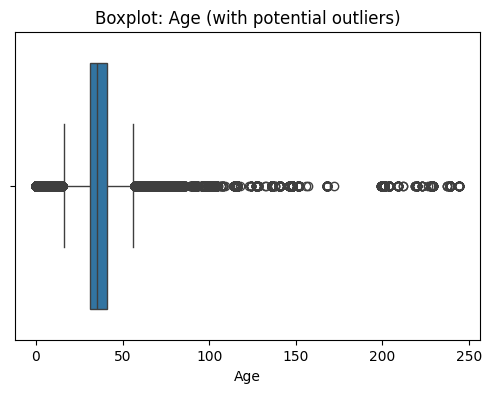

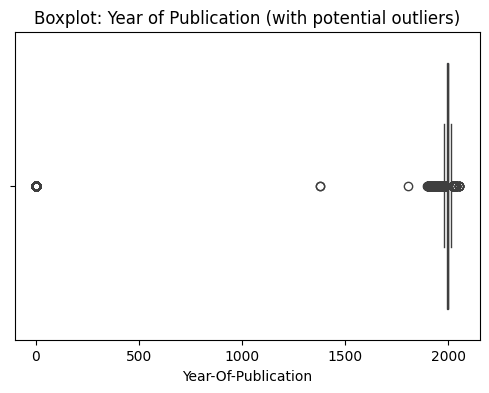

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------
#  IQR Function
# -------------------------
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"\n{col} outliers: {len(outliers)} rows")
    print(f"Lower bound = {lower}, Upper bound = {upper}")
    return lower, upper, outliers

# -------------------------
# 2) Detect Outliers in Age & Year-Of-Publication
# -------------------------
age_lower, age_upper, age_outliers = detect_outliers_iqr(df, "Age")
year_lower, year_upper, year_outliers = detect_outliers_iqr(df, "Year-Of-Publication")

# Visualize with boxplots
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Age"])
plt.title("Boxplot: Age (with potential outliers)")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df["Year-Of-Publication"])
plt.title("Boxplot: Year of Publication (with potential outliers)")
plt.show()



Age column cleaned. Range: 5.0 - 100.0
Year column cleaned. Range: 1806.0 - 2024.0


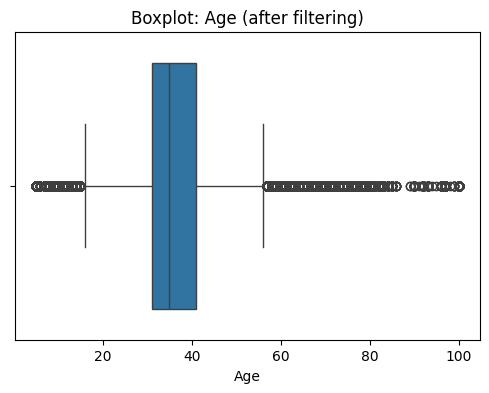

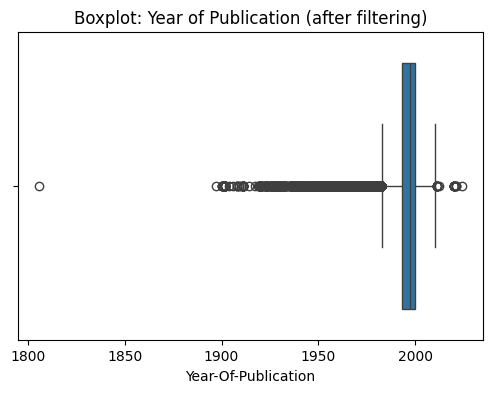


After handling outliers:
Age stats:
 count    1.129777e+06
mean     3.641843e+01
std      1.042253e+01
min      5.000000e+00
25%      3.100000e+01
50%      3.500000e+01
75%      4.100000e+01
max      1.000000e+02
Name: Age, dtype: float64
Year-Of-Publication stats:
 count    1.129777e+06
mean     1.995477e+03
std      6.937065e+00
min      1.806000e+03
25%      1.993000e+03
50%      1.997000e+03
75%      2.000000e+03
max      2.024000e+03
Name: Year-Of-Publication, dtype: float64


In [8]:
# -------------------------
# 3) Handle Outliers
# -------------------------

# Age cleaning
df["Age"] = df["Age"].fillna(df["Age"].median())
df = df[(df["Age"] >= 5) & (df["Age"] <= 100)]
print("Age column cleaned. Range:", df["Age"].min(), "-", df["Age"].max())

# Year-Of-Publication cleaning
# Convert to numeric (in case of stray strings)
df["Year-Of-Publication"] = pd.to_numeric(df["Year-Of-Publication"], errors="coerce")

# Keep only realistic years (1450 – 2025)
df = df[(df["Year-Of-Publication"] >= 1450) & (df["Year-Of-Publication"] <= 2025)]

print("Year column cleaned. Range:", df["Year-Of-Publication"].min(), "-", df["Year-Of-Publication"].max())

# -------------------------
# 3) Visualize after cleaning
# -------------------------
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Age"])
plt.title("Boxplot: Age (after filtering)")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df["Year-Of-Publication"])
plt.title("Boxplot: Year of Publication (after filtering)")
plt.show()

# -------------------------
# 4) Re-check
# -------------------------
print("\nAfter handling outliers:")
print("Age stats:\n", df["Age"].describe())
print("Year-Of-Publication stats:\n", df["Year-Of-Publication"].describe())


In [9]:
# Convert text to lowercase or title case (for consistency).
df["Book-Title"] = df["Book-Title"].str.title()
df["Book-Author"] = df["Book-Author"].str.title()
df["Publisher"] = df["Publisher"].str.title()


# Helps avoid duplicates like "harry potter" vs "Harry Potter".
df["Book-Title"] = df["Book-Title"].str.strip()


In [10]:
# Keep users with at least 5 ratings
df = df.groupby("User-ID").filter(lambda x: len(x) >= 5)

# Keep books with at least 5 ratings
df = df.groupby("Book-Title").filter(lambda x: len(x) >= 5)


In [11]:
from sklearn.preprocessing import LabelEncoder

user_encoder = LabelEncoder()
book_encoder = LabelEncoder()

df["user_idx"] = user_encoder.fit_transform(df["User-ID"])
df["book_idx"] = book_encoder.fit_transform(df["ISBN"])


In [12]:
import pickle

# Save encoders
with open("user_encoder.pkl", "wb") as f:
    pickle.dump(user_encoder, f)

with open("book_encoder.pkl", "wb") as f:
    pickle.dump(book_encoder, f)

# Save cleaned dataset
df.to_csv("clean_books.csv", index=False)


In [13]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import time

# -----------------------------
# Prepare Explicit Ratings
# -----------------------------
explicit = df[df["Book-Rating"] > 0].copy()

# Filter users/books with at least 5 ratings
user_counts = explicit["User-ID"].value_counts()
book_counts = explicit["ISBN"].value_counts()
explicit = explicit[explicit["User-ID"].isin(user_counts[user_counts >= 5].index)]
explicit = explicit[explicit["ISBN"].isin(book_counts[book_counts >= 5].index)]
explicit.reset_index(drop=True, inplace=True)

# Encode user/book IDs
user2idx = {u:i for i,u in enumerate(explicit["User-ID"].unique())}
book2idx = {b:i for i,b in enumerate(explicit["ISBN"].unique())}
explicit["user_idx"] = explicit["User-ID"].map(user2idx)
explicit["book_idx"] = explicit["ISBN"].map(book2idx)

n_users = explicit["user_idx"].nunique()
n_books = explicit["book_idx"].nunique()
print("Users:", n_users, "Books:", n_books)

Users: 10667 Books: 11749


In [14]:
# Train/Test Split: one test per user
# -----------------------------
test_df = explicit.groupby("user_idx", group_keys=False).apply(lambda x: x.sample(1, random_state=42))
train_df = explicit.drop(test_df.index).reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

# Sparse matrix
train_matrix = csr_matrix((train_df["Book-Rating"],
                           (train_df["user_idx"], train_df["book_idx"])),
                          shape=(n_users, n_books))

# Global stats
global_mean = train_df["Book-Rating"].mean()
item_means = train_df.groupby("book_idx")["Book-Rating"].mean().to_dict()

y_true = test_df["Book-Rating"].values

/tmp/ipython-input-104167585.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_df = explicit.groupby("user_idx", group_keys=False).apply(lambda x: x.sample(1, random_state=42))


In [17]:
# -----------------------------
# 1. Popularity Baseline
# -----------------------------
print("\n>>> Model 1: Popularity Baseline")

y_pred_pop = test_df["book_idx"].map(item_means).fillna(global_mean).values
rmse_pop = math.sqrt(mean_squared_error(y_true, y_pred_pop))
mae_pop = mean_absolute_error(y_true, y_pred_pop)
print("RMSE:", round(rmse_pop,4), "| MAE:", round(mae_pop,4))

# -----------------------------
# 2. Item-based KNN (cosine similarity)
# -----------------------------
print("\n>>> Model 2: Item-based KNN")

item_user_matrix = train_matrix.T  # items as rows
knn_item = NearestNeighbors(metric="cosine", algorithm="brute", n_neighbors=21)
knn_item.fit(item_user_matrix)

# Precompute neighbors
dists_item, neighbors_item = knn_item.kneighbors(item_user_matrix, return_distance=True)

def predict_item_knn(u_idx, b_idx, k=20):
    neighs = neighbors_item[b_idx, 1:k+1]
    sims = 1 - dists_item[b_idx, 1:k+1]
    ratings = train_matrix[u_idx, neighs].toarray().flatten()
    mask = ratings > 0
    if mask.sum() == 0:
        return item_means.get(b_idx, global_mean)
    sims = sims[mask]
    ratings = ratings[mask]
    return np.dot(sims, ratings) / sims.sum() if sims.sum() > 0 else ratings.mean()

y_pred_knn = [predict_item_knn(int(u), int(b)) for u,b in zip(test_df["user_idx"], test_df["book_idx"])]
rmse_knn = math.sqrt(mean_squared_error(y_true, y_pred_knn))
mae_knn = mean_absolute_error(y_true, y_pred_knn)
print("RMSE:", round(rmse_knn,4), "| MAE:", round(mae_knn,4))

# -----------------------------
# 3. Matrix Factorization (SVD)
# -----------------------------
print("\n>>> Model 3: Matrix Factorization (Truncated SVD)")

svd = TruncatedSVD(n_components=50, random_state=42)
user_factors = svd.fit_transform(train_matrix)
item_factors = svd.components_.T

def predict_svd(u_idx, b_idx):
    pred = np.dot(user_factors[u_idx], item_factors[b_idx])
    return float(np.clip(pred, train_df["Book-Rating"].min(), train_df["Book-Rating"].max()))

y_pred_svd = [predict_svd(int(u), int(b)) for u,b in zip(test_df["user_idx"], test_df["book_idx"])]
rmse_svd = math.sqrt(mean_squared_error(y_true, y_pred_svd))
mae_svd = mean_absolute_error(y_true, y_pred_svd)
print("RMSE:", round(rmse_svd,4), "| MAE:", round(mae_svd,4))

# -----------------------------
# 4. User-based KNN (cosine similarity)
# -----------------------------
print("\n>>> Model 4: User-based KNN")

user_item_matrix = train_matrix  # users as rows
knn_user = NearestNeighbors(metric="cosine", algorithm="brute", n_neighbors=21)
knn_user.fit(user_item_matrix)

# Precompute neighbors
dists_user, neighbors_user = knn_user.kneighbors(user_item_matrix, return_distance=True)

def predict_user_knn(u_idx, b_idx, k=20):
    neighs = neighbors_user[u_idx, 1:k+1]
    sims = 1 - dists_user[u_idx, 1:k+1]
    ratings = train_matrix[neighs, b_idx].toarray().flatten()
    mask = ratings > 0
    if mask.sum() == 0:
        return item_means.get(b_idx, global_mean)
    sims = sims[mask]
    ratings = ratings[mask]
    return np.dot(sims, ratings) / sims.sum() if sims.sum() > 0 else ratings.mean()

y_pred_user_knn = [predict_user_knn(int(u), int(b)) for u,b in zip(test_df["user_idx"], test_df["book_idx"])]
rmse_user_knn = math.sqrt(mean_squared_error(y_true, y_pred_user_knn))
mae_user_knn = mean_absolute_error(y_true, y_pred_user_knn)
print("RMSE:", round(rmse_user_knn,4), "| MAE:", round(mae_user_knn,4))

# -----------------------------
# Results Comparison
# -----------------------------
results = pd.DataFrame({
    "Model": ["Popularity", "Item-KNN", "SVD", "User-KNN"],
    "RMSE": [rmse_pop, rmse_knn, rmse_svd, rmse_user_knn],
    "MAE": [mae_pop, mae_knn, mae_svd, mae_user_knn]
})


>>> Model 1: Popularity Baseline
RMSE: 1.7913 | MAE: 1.4045

>>> Model 2: Item-based KNN
RMSE: 1.7673 | MAE: 1.3505

>>> Model 3: Matrix Factorization (Truncated SVD)
RMSE: 6.8985 | MAE: 6.6583

>>> Model 4: User-based KNN
RMSE: 1.8744 | MAE: 1.4546



=== Final Model Evaluation ===


,Model,RMSE,MAE,Time (s)
0,Item-KNN,1.767000,1.350000,1.870000
1,SVD,6.898000,6.658000,2.910000


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


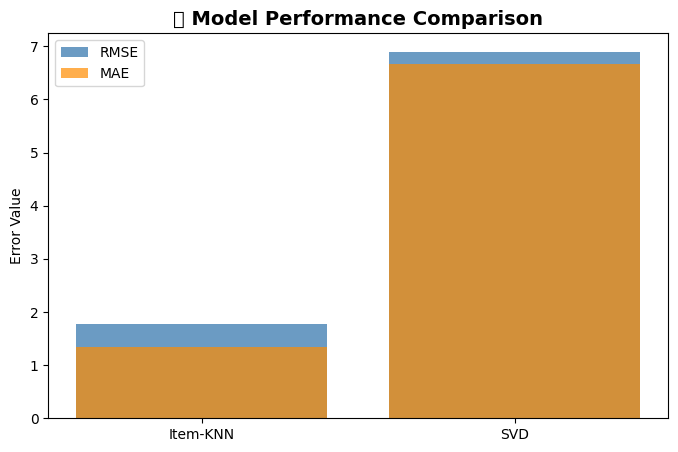

In [18]:
# Model Evaluation
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

def evaluate_model(name, y_true, y_pred, start_time, end_time):
    """Return RMSE, MAE, and runtime for one model."""
    rmse = math.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    runtime = round(end_time - start_time, 2)
    return {"Model": name, "RMSE": round(rmse,3), "MAE": round(mae,3), "Time (s)": runtime}

results = []

# # -----------------------------
# # 1. Popularity Baseline
# # -----------------------------
# start = time.time()
# y_pred_pop = test_df["book_idx"].map(item_means).fillna(global_mean).values
# end = time.time()
# results.append(evaluate_model("Popularity", y_true, y_pred_pop, start, end))

# -----------------------------
# 2. Item-based KNN
# -----------------------------
start = time.time()
y_pred_knn = [predict_item_knn(int(u), int(b)) for u,b in zip(test_df["user_idx"], test_df["book_idx"])]
end = time.time()
results.append(evaluate_model("Item-KNN", y_true, y_pred_knn, start, end))

# -----------------------------
# 3. Matrix Factorization (SVD)
# -----------------------------
start = time.time()
y_pred_svd = [predict_svd(int(u), int(b)) for u,b in zip(test_df["user_idx"], test_df["book_idx"])]
end = time.time()
results.append(evaluate_model("SVD", y_true, y_pred_svd, start, end))


# # 4. User-based KNN
# # -----------------------------
# start = time.time()
# y_pred_user_knn = [predict_user_knn(int(u), int(b)) for u,b in zip(test_df["user_idx"], test_df["book_idx"])]
# end = time.time()
# results.append(evaluate_model("User-KNN", y_true, y_pred_user_knn, start, end))

# -----------------------------
# Final Comparison Table
# -----------------------------
results_df = pd.DataFrame(results).sort_values("RMSE").reset_index(drop=True)

print("\n=== Final Model Evaluation ===")
display(results_df.style.set_caption("Model Performance Comparison")
        .highlight_min(subset=["RMSE", "MAE"], color="lightgreen")
        .highlight_max(subset=["RMSE", "MAE"], color="salmon"))


plt.figure(figsize=(8,5))
plt.bar(results_df["Model"], results_df["RMSE"], color="steelblue", alpha=0.8, label="RMSE")
plt.bar(results_df["Model"], results_df["MAE"], color="darkorange", alpha=0.7, label="MAE")
plt.title("📊 Model Performance Comparison", fontsize=14, weight="bold")
plt.ylabel("Error Value")
plt.legend()
plt.show()

In [19]:
import pandas as pd
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

# -----------------------------
# 1. Load dataset
# -----------------------------
df = pd.read_csv("clean_books.csv")

# -----------------------------
# 2. Encode User-ID and ISBN
# -----------------------------
user_encoder = LabelEncoder()
book_encoder = LabelEncoder()

df["user_idx"] = user_encoder.fit_transform(df["User-ID"])
df["book_idx"] = book_encoder.fit_transform(df["ISBN"])

# -----------------------------
# 3. Build rating matrix
# -----------------------------
rating_matrix = csr_matrix(
    (df["Book-Rating"].values, (df["user_idx"].values, df["book_idx"].values)),
    shape=(len(user_encoder.classes_), len(book_encoder.classes_))
)

print("✅ Rating matrix shape:", rating_matrix.shape)

# -----------------------------
# 4. Train SVD
# -----------------------------
svd = TruncatedSVD(n_components=50, random_state=42)
svd.fit(rating_matrix)
print("✅ SVD trained with shape:", svd.components_.shape)

# -----------------------------
# 5. Train KNN models
# -----------------------------
# Item-based similarity
knn_item = NearestNeighbors(metric="cosine", algorithm="brute")
knn_item.fit(rating_matrix.T)

# User-based similarity
knn_user = NearestNeighbors(metric="cosine", algorithm="brute")
knn_user.fit(rating_matrix)

print("✅ KNN models trained")

# -----------------------------
# 6. Save all artifacts
# -----------------------------
with open("user_encoder.pkl", "wb") as f:
    pickle.dump(user_encoder, f)
with open("book_encoder.pkl", "wb") as f:
    pickle.dump(book_encoder, f)
with open("svd_model.pkl", "wb") as f:
    pickle.dump(svd, f)
with open("knn_item.pkl", "wb") as f:
    pickle.dump(knn_item, f)
with open("knn_user.pkl", "wb") as f:
    pickle.dump(knn_user, f)

print("🎉 All models and encoders saved successfully!")


✅ Rating matrix shape: (22301, 116668)
✅ SVD trained with shape: (50, 116668)
✅ KNN models trained
🎉 All models and encoders saved successfully!


In [20]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 108.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 107.2 MB/s eta 0:00:00


In [23]:
!pip install streamlit pyngrok

In [21]:
# app.py
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle
from scipy.sparse import csr_matrix

# -----------------------------
# Page setup
# -----------------------------
st.set_page_config(page_title="📚 Book Recommender", layout="wide")
st.title("📚 Book Recommendation System")
st.caption("Choose a mode below, provide input, and get instant recommendations.")

# -----------------------------
# 1) Load data & models (once)
# -----------------------------
@st.cache_data(show_spinner=False)
def load_data():
    df = pd.read_csv("clean_books.csv")

    with open("user_encoder.pkl", "rb") as f:
        user_encoder = pickle.load(f)
    with open("book_encoder.pkl", "rb") as f:
        book_encoder = pickle.load(f)
    with open("svd_model.pkl", "rb") as f:
        svd = pickle.load(f)
    with open("knn_item.pkl", "rb") as f:
        knn_item = pickle.load(f)

    # Rebuild indices
    df["user_idx"] = user_encoder.transform(df["User-ID"])
    df["book_idx"] = book_encoder.transform(df["ISBN"])

    rating_matrix = csr_matrix(
        (df["Book-Rating"].values,
         (df["user_idx"].values, df["book_idx"].values)),
        shape=(len(user_encoder.classes_), len(book_encoder.classes_))
    )

    global_mean = df["Book-Rating"].mean()
    item_means = df.groupby("book_idx")["Book-Rating"].mean().to_dict()

    # Precompute SVD factors
    user_factors = svd.transform(rating_matrix)
    item_factors = svd.components_.T

    # Lookups
    title_to_bidx = (
        df.drop_duplicates(["Book-Title"])
          .set_index("Book-Title")["book_idx"]
          .to_dict()
    )

    rep_books = (
        df.sort_values("Book-Rating", ascending=False)
          .drop_duplicates(["book_idx"])
          .set_index("book_idx")[["ISBN", "Book-Title", "Book-Author", "Publisher"]]
    )

    return (df, user_encoder, book_encoder, svd, knn_item, rating_matrix,
            global_mean, item_means, user_factors, item_factors, title_to_bidx, rep_books)

(df, user_encoder, book_encoder, svd, knn_item, rating_matrix,
 global_mean, item_means, user_factors, item_factors, title_to_bidx, rep_books) = load_data()

# -----------------------------
# 2) Predictors
# -----------------------------
def predict_popularity(b_idx: int) -> float:
    return item_means.get(b_idx, global_mean)

def predict_svd(u_idx: int, b_idx: int) -> float:
    pred = float(np.dot(user_factors[u_idx], item_factors[b_idx]))
    return float(np.clip(pred, 1, 10))

def similar_books_item_knn(b_idx: int, k: int = 10):
    vec = rating_matrix[:, b_idx].T
    dists, neighs = knn_item.kneighbors(vec, n_neighbors=k+1, return_distance=True)
    dists = dists.flatten()[1:]
    neighs = neighs.flatten()[1:]
    sims = 1 - dists
    return neighs, sims

# -----------------------------
# 3) UI — Tabs
# -----------------------------
tab1, tab2 = st.tabs(["👤 User-based Recommendations", "📖 Similar Books (Item-KNN)"])

# ===== TAB 1: USER-BASED =====
with tab1:
    left, right = st.columns([1, 2])

    with left:
        st.subheader("Input")
        mode = st.radio("Provide User-ID via:", ["Search & Pick", "Type manually"], index=0)

        if mode == "Search & Pick":
            search_user = st.text_input("🔎 Search User-ID:")
            if search_user:
                matches = [uid for uid in df["User-ID"].unique() if str(search_user) in str(uid)]
                matches = matches[:50]
                if matches:
                    user_id = st.selectbox("Matching User-IDs:", matches)
                else:
                    st.warning("No matching User-ID found.")
                    user_id = None
            else:
                user_id = None
        else:
            user_id = st.text_input("Type User-ID (must exist in data):", "")

        model_choice = st.radio("Choose model:", ["Popularity", "SVD"], index=1)
        top_n = st.number_input("How many recommendations?", min_value=1, max_value=20, value=5, step=1)
        run_btn = st.button("🔍 Get Recommendations")

    with right:
        st.subheader("Output")
        if run_btn:
            if not user_id:
                st.warning("Please provide a valid User-ID.")
            else:
                try:
                    sample = user_encoder.classes_[0]
                    if isinstance(sample, (np.integer, int)):
                        user_id_norm = int(user_id)
                    else:
                        user_id_norm = str(user_id)
                except Exception:
                    user_id_norm = user_id

                if user_id_norm not in set(user_encoder.classes_):
                    st.error("User-ID not found in the trained encoder.")
                else:
                    u_idx = int(user_encoder.transform([user_id_norm])[0])

                    scores = {}
                    for b_idx in range(len(item_factors)):
                        if model_choice == "Popularity":
                            scores[b_idx] = predict_popularity(b_idx)
                        else:
                            scores[b_idx] = predict_svd(u_idx, b_idx)

                    top = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:top_n]
                    top_bidx = [b for b, _ in top]
                    out = (
                    df[df["book_idx"].isin(top_bidx)]
                    .drop_duplicates("book_idx")
                    [["ISBN", "Book-Title", "Book-Author", "Publisher"]]
                    .set_index("ISBN")
                    )
                    out["Predicted-Score"] = [round(scores[b], 3) for b in top_bidx]


                    st.markdown(f"**Top {top_n} Recommended Books — {model_choice}**")
                    st.dataframe(out.reset_index(drop=True))

# ===== TAB 2: ITEM SIMILARITY =====
with tab2:
    left2, right2 = st.columns([1, 2])

    with left2:
        st.subheader("Input")
        search_title = st.text_input("🔎 Search Book Title:")
        if search_title:
            matches = df[df["Book-Title"].str.contains(search_title, case=False, na=False)]["Book-Title"].unique()
            matches = matches[:50]
            if len(matches) > 0:
                sel_title = st.selectbox("Matching Books:", matches)
            else:
                st.warning("No matching book found.")
                sel_title = None
        else:
            sel_title = None

        k_neighbors = st.number_input("How many similar books?", min_value=1, max_value=20, value=5, step=1)
        sim_btn = st.button("🔁 Find Similar Books")

    with right2:
        st.subheader("Output")
        if sim_btn and sel_title:
            if sel_title not in title_to_bidx:
                st.error("Could not map the selected title to a known book index.")
            else:
                b_idx = int(title_to_bidx[sel_title])
                neighs, sims = similar_books_item_knn(b_idx, k=k_neighbors)
                neigh_bidx = list(neighs)
                result = (
                df[df["book_idx"].isin(neigh_bidx)]
                .drop_duplicates("book_idx")
                [["ISBN", "Book-Title", "Book-Author", "Publisher"]]
                )
                result["Similarity (approx)"] = [round(float(s), 3) for s in sims]

                st.markdown(f"**Books similar to:** _{sel_title}_")
                st.dataframe(result.reset_index(drop=True))


Writing app.py


In [24]:
# --- Launch with ngrok ---
from pyngrok import ngrok
import threading, os

# 🔑 Add your token
ngrok.set_auth_token("32HgEzLcjbyB46LOHRgyIUHyUx9_3naMu8pjKcbB3MSgpeMVm")

# 🚀 Start Streamlit in background
def run_app():
    os.system("streamlit run app.py --server.port 8501")

thread = threading.Thread(target=run_app)
thread.start()

# 🌍 Public link
public_url = ngrok.connect(8501)
print("✅ Streamlit App is running here:", public_url)

✅ Streamlit App is running here: NgrokTunnel: "https://563998557609.ngrok-free.app" -> "http://localhost:8501"
